## Importing packages

In [5]:
import os
import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).
import seaborn as sns # Making statistical graphs onhttp://localhost:8888/notebooks/Documents/SEM%202/BAN%20612/PROJECT/PROJECT%20DOCS/Group7_Code.ipynb#Loading-and-Examining-the-dataframe%C2%B6 top of what matplot can do 
import matplotlib.pylab as plt # %matplotlib inline renders the figure in a notebook
import statsmodels.formula.api as sm
!pip install dmba
import dmba

from sklearn.model_selection import train_test_split # for data partition.
from sklearn.linear_model import LinearRegression # for linear regression model.
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

%matplotlib inline

## Loading and Examining the dataframe

In [6]:
df = pd.read_csv('used_device_data.csv')
df.columns

Index(['device_brand', 'os', 'screen_size', '4g', '5g', 'rear_camera_mp',
       'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

In [297]:
df.shape

(3454, 15)

In [5]:
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


## Cleanup

Preprocessing and cleaning up data is an important aspect of data analysis.

In [7]:
#Removing duplicates
df.drop_duplicates(inplace=True)
df.shape

(3454, 15)

In [8]:
df.columns

Index(['device_brand', 'os', 'screen_size', '4g', '5g', 'rear_camera_mp',
       'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

## Cleaning the DataFrame of all the NaN values

In [9]:
nan_counts = df.isna().sum()
data_types = df.dtypes
info_df = pd.DataFrame({'Data Type': data_types, 'NaN Count': nan_counts})
print(info_df)

                      Data Type  NaN Count
device_brand             object          0
os                       object          0
screen_size             float64          0
4g                       object          0
5g                       object          0
rear_camera_mp          float64        179
front_camera_mp         float64          2
internal_memory         float64          4
ram                     float64          4
battery                 float64          6
weight                  float64          7
release_year              int64          0
days_used                 int64          0
normalized_used_price   float64          0
normalized_new_price    float64          0


In [10]:
df1 = df.dropna()

In [11]:
nan_counts = df1.isna().sum()
data_types = df1.dtypes
info_df = pd.DataFrame({'Data Type': data_types, 'NaN Count': nan_counts})
print(info_df)

                      Data Type  NaN Count
device_brand             object          0
os                       object          0
screen_size             float64          0
4g                       object          0
5g                       object          0
rear_camera_mp          float64          0
front_camera_mp         float64          0
internal_memory         float64          0
ram                     float64          0
battery                 float64          0
weight                  float64          0
release_year              int64          0
days_used                 int64          0
normalized_used_price   float64          0
normalized_new_price    float64          0


In [12]:
df1.shape

(3253, 15)

## Cleaned Dataframe written to Cleaned Dataset (Excel File) 

In [303]:
!pip install XlsxWriter

# Export DataFrame to an Excel file
excel_file_path = "Cleaned_Dataset.xlsx"  
with pd.ExcelWriter(excel_file_path, engine='xlsxwriter') as writer:
    df1.to_excel(writer, sheet_name='Data', index=False)
    info_df.to_excel(writer, sheet_name='Info', index=True)
print("DataFrame exported to Excel file:", excel_file_path)

DataFrame exported to Excel file: Cleaned_Dataset.xlsx


## Summary Statistics for Used Device Dataset

In [13]:
np.round(df1.describe(), decimals=2)

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3253.00,3253.00,3253.00,3253.00,3253.00,3253.00,3253.00,3253.00,3253.00,3253.00,3253.00
mean,13.62,9.48,6.09,52.10,3.96,3074.93,182.49,2015.77,695.70,4.34,5.22
std,3.85,4.80,6.60,85.44,1.23,1296.96,90.36,2.19,235.45,0.58,0.67
min,5.08,0.08,0.00,0.01,0.02,500.00,69.00,2013.00,91.00,1.54,2.90
25%,12.70,5.00,2.00,16.00,4.00,2100.00,140.45,2014.00,564.00,4.02,4.79
50%,12.83,8.00,5.00,32.00,4.00,3000.00,158.00,2015.00,705.00,4.38,5.24
75%,15.32,13.00,8.00,64.00,4.00,3950.00,182.00,2018.00,879.00,4.73,5.64
max,30.71,48.00,32.00,1024.00,12.00,9720.00,855.00,2020.00,1094.00,6.62,7.85


## Creating Dummies

In [14]:
new_df = df1[['device_brand', 'os', 'screen_size', '4g', '5g', 'rear_camera_mp',
       'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price']]

new_df = pd.get_dummies(new_df, prefix_sep='_', drop_first=True)
col0 = len(new_df.columns)-1
new_df.head()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,...,device_brand_Spice,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,...,False,False,False,False,False,False,False,False,True,False
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,...,False,False,False,False,False,False,False,False,True,True
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,...,False,False,False,False,False,False,False,False,True,True
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,...,False,False,False,False,False,False,False,False,True,True
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,...,False,False,False,False,False,False,False,False,True,False


In [15]:
new_df.columns

Index(['screen_size', 'rear_camera_mp', 'front_camera_mp', 'internal_memory',
       'ram', 'battery', 'weight', 'release_year', 'days_used',
       'normalized_used_price', 'normalized_new_price', 'device_brand_Alcatel',
       'device_brand_Apple', 'device_brand_Asus', 'device_brand_BlackBerry',
       'device_brand_Celkon', 'device_brand_Coolpad', 'device_brand_Gionee',
       'device_brand_Google', 'device_brand_HTC', 'device_brand_Honor',
       'device_brand_Huawei', 'device_brand_Karbonn', 'device_brand_LG',
       'device_brand_Lava', 'device_brand_Lenovo', 'device_brand_Meizu',
       'device_brand_Micromax', 'device_brand_Microsoft',
       'device_brand_Motorola', 'device_brand_Nokia', 'device_brand_OnePlus',
       'device_brand_Oppo', 'device_brand_Others', 'device_brand_Panasonic',
       'device_brand_Realme', 'device_brand_Samsung', 'device_brand_Sony',
       'device_brand_Spice', 'device_brand_Vivo', 'device_brand_XOLO',
       'device_brand_Xiaomi', 'device_brand_ZTE

## Categorical and Numerical Variable

In [16]:
# Convert numeric variables that are to categorical
cat_variables = ['device_brand_Alcatel',
       'device_brand_Apple', 'device_brand_Asus', 'device_brand_BlackBerry',
       'device_brand_Celkon', 'device_brand_Coolpad', 'device_brand_Gionee',
       'device_brand_Google', 'device_brand_HTC', 'device_brand_Honor',
       'device_brand_Huawei', 'device_brand_Karbonn', 'device_brand_LG',
       'device_brand_Lava', 'device_brand_Lenovo', 'device_brand_Meizu',
       'device_brand_Micromax', 'device_brand_Microsoft',
       'device_brand_Motorola', 'device_brand_Nokia', 'device_brand_OnePlus',
       'device_brand_Oppo', 'device_brand_Others', 'device_brand_Panasonic',
       'device_brand_Realme', 'device_brand_Samsung', 'device_brand_Sony',
       'device_brand_Spice', 'device_brand_Vivo', 'device_brand_XOLO',
       'device_brand_Xiaomi', 'device_brand_ZTE', 'os_Others', 'os_Windows',
       'os_iOS', '4g_yes', '5g_yes']
for var in cat_variables:
    print(f"Original dtype of {var}: {new_df[var].dtype}")
    new_df[var] = new_df[var].astype('category')
    print(f"Categories for {var}: {new_df[var].cat.categories}")
    print(f"Updated dtype of {var}: {new_df[var].dtype}\n")

Original dtype of device_brand_Alcatel: bool
Categories for device_brand_Alcatel: Index([False, True], dtype='bool')
Updated dtype of device_brand_Alcatel: category

Original dtype of device_brand_Apple: bool
Categories for device_brand_Apple: Index([False, True], dtype='bool')
Updated dtype of device_brand_Apple: category

Original dtype of device_brand_Asus: bool
Categories for device_brand_Asus: Index([False, True], dtype='bool')
Updated dtype of device_brand_Asus: category

Original dtype of device_brand_BlackBerry: bool
Categories for device_brand_BlackBerry: Index([False, True], dtype='bool')
Updated dtype of device_brand_BlackBerry: category

Original dtype of device_brand_Celkon: bool
Categories for device_brand_Celkon: Index([False, True], dtype='bool')
Updated dtype of device_brand_Celkon: category

Original dtype of device_brand_Coolpad: bool
Categories for device_brand_Coolpad: Index([False, True], dtype='bool')
Updated dtype of device_brand_Coolpad: category

Original dtyp

In [17]:
data_types = new_df.dtypes
info_df = pd.DataFrame({'Data Type': data_types})
print(info_df)

                        Data Type
screen_size               float64
rear_camera_mp            float64
front_camera_mp           float64
internal_memory           float64
ram                       float64
battery                   float64
weight                    float64
release_year                int64
days_used                   int64
normalized_used_price     float64
normalized_new_price      float64
device_brand_Alcatel     category
device_brand_Apple       category
device_brand_Asus        category
device_brand_BlackBerry  category
device_brand_Celkon      category
device_brand_Coolpad     category
device_brand_Gionee      category
device_brand_Google      category
device_brand_HTC         category
device_brand_Honor       category
device_brand_Huawei      category
device_brand_Karbonn     category
device_brand_LG          category
device_brand_Lava        category
device_brand_Lenovo      category
device_brand_Meizu       category
device_brand_Micromax    category
device_brand_M

In [18]:
# Checking variables that are of numeric data type & categorical data type
num_variables = list(new_df.select_dtypes(include=['float64','int64']).columns)
print('Numerical Variables :', num_variables)
cat_variables = list(new_df.select_dtypes(include=['category']).columns)
print('Categorical Variables :', cat_variables)

Numerical Variables : ['screen_size', 'rear_camera_mp', 'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'normalized_used_price', 'normalized_new_price']
Categorical Variables : ['device_brand_Alcatel', 'device_brand_Apple', 'device_brand_Asus', 'device_brand_BlackBerry', 'device_brand_Celkon', 'device_brand_Coolpad', 'device_brand_Gionee', 'device_brand_Google', 'device_brand_HTC', 'device_brand_Honor', 'device_brand_Huawei', 'device_brand_Karbonn', 'device_brand_LG', 'device_brand_Lava', 'device_brand_Lenovo', 'device_brand_Meizu', 'device_brand_Micromax', 'device_brand_Microsoft', 'device_brand_Motorola', 'device_brand_Nokia', 'device_brand_OnePlus', 'device_brand_Oppo', 'device_brand_Others', 'device_brand_Panasonic', 'device_brand_Realme', 'device_brand_Samsung', 'device_brand_Sony', 'device_brand_Spice', 'device_brand_Vivo', 'device_brand_XOLO', 'device_brand_Xiaomi', 'device_brand_ZTE', 'os_Others', 'os_Windows', 'os_iOS', '4g_yes', 

## Exploratory Data Analysis

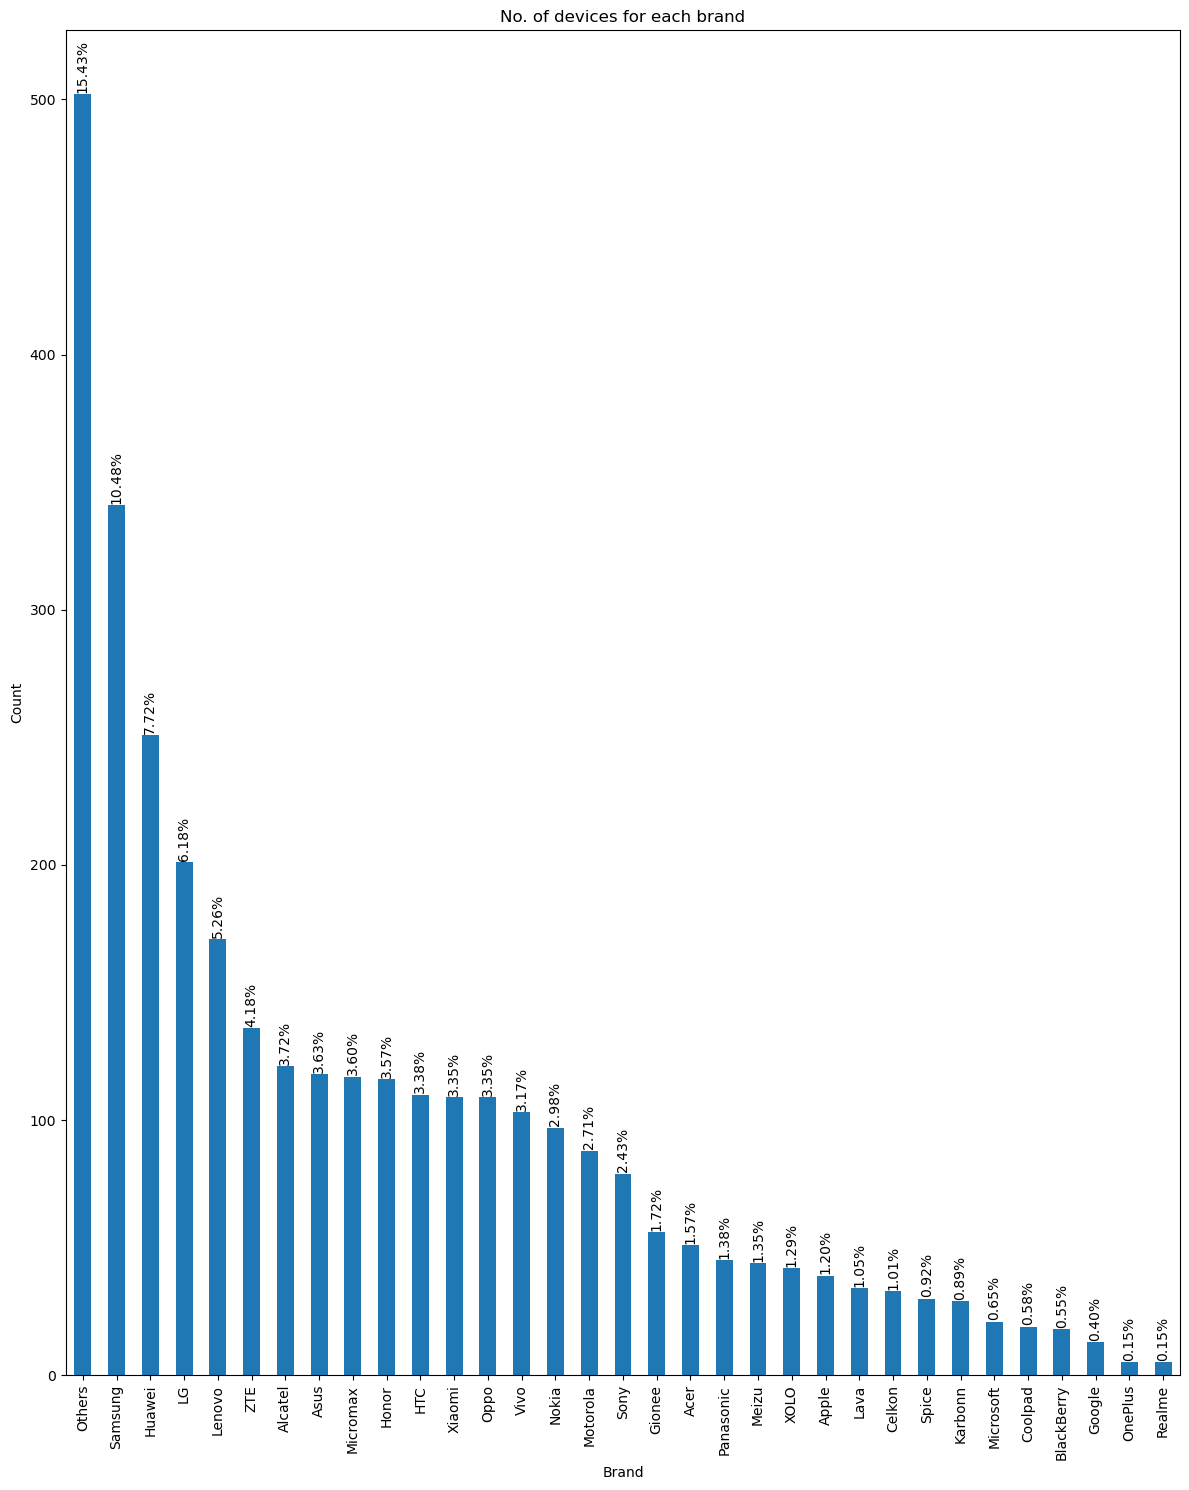

In [20]:
brand_total = df1['device_brand'].value_counts()
brand_descending = brand_total.sort_values(ascending = False)
brand_percentage = (brand_descending / brand_descending.sum()) * 100
plt.figure(figsize = (12, 15))
brand_descending.plot(kind = 'bar')
for i, v in enumerate(brand_descending):
    plt.text(i, v + 0.5, f'{brand_percentage[i]:.2f}%', ha='center', va='bottom', rotation=90)
plt.title('No. of devices for each brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

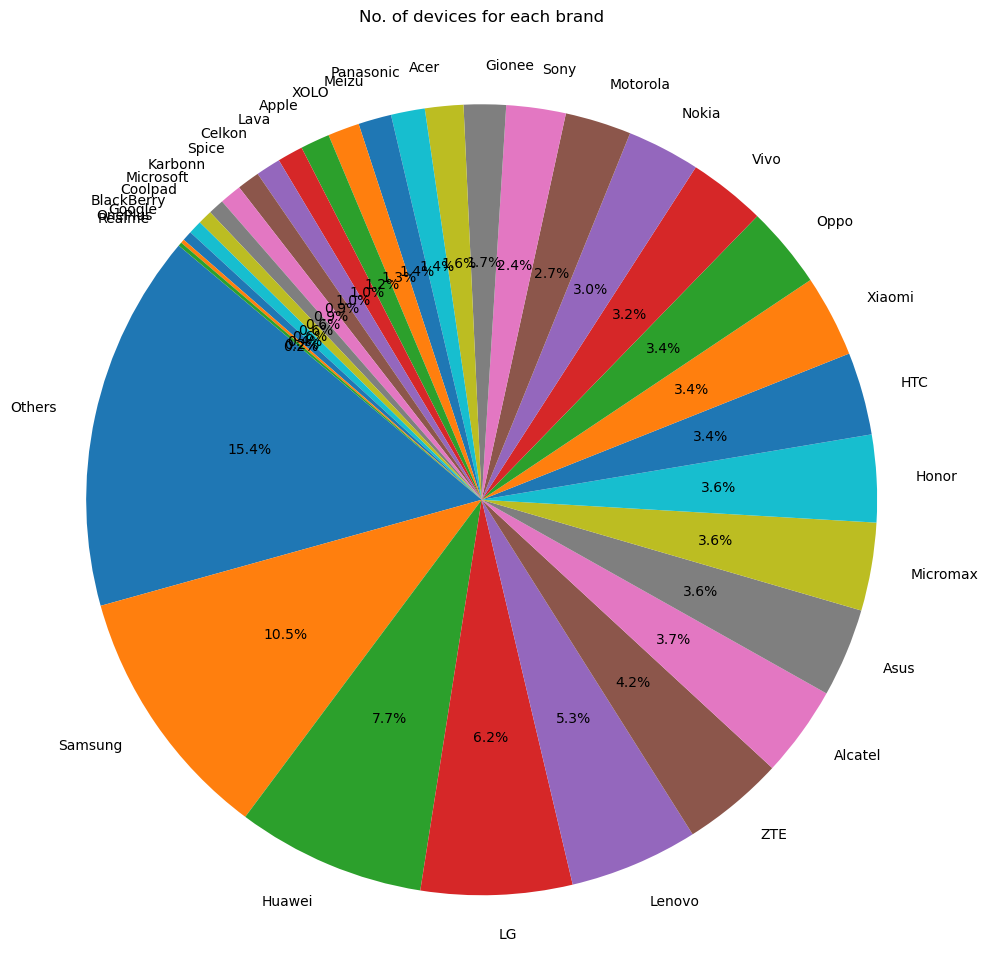

In [21]:
brand_total = df1['device_brand'].value_counts()
brand_descending = brand_total.sort_values(ascending=False)
brand_percentage = (brand_descending / brand_descending.sum()) * 100
plt.figure(figsize=(10, 10))
plt.pie(brand_descending, labels=brand_descending.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('No. of devices for each brand')
plt.tight_layout()
plt.show()

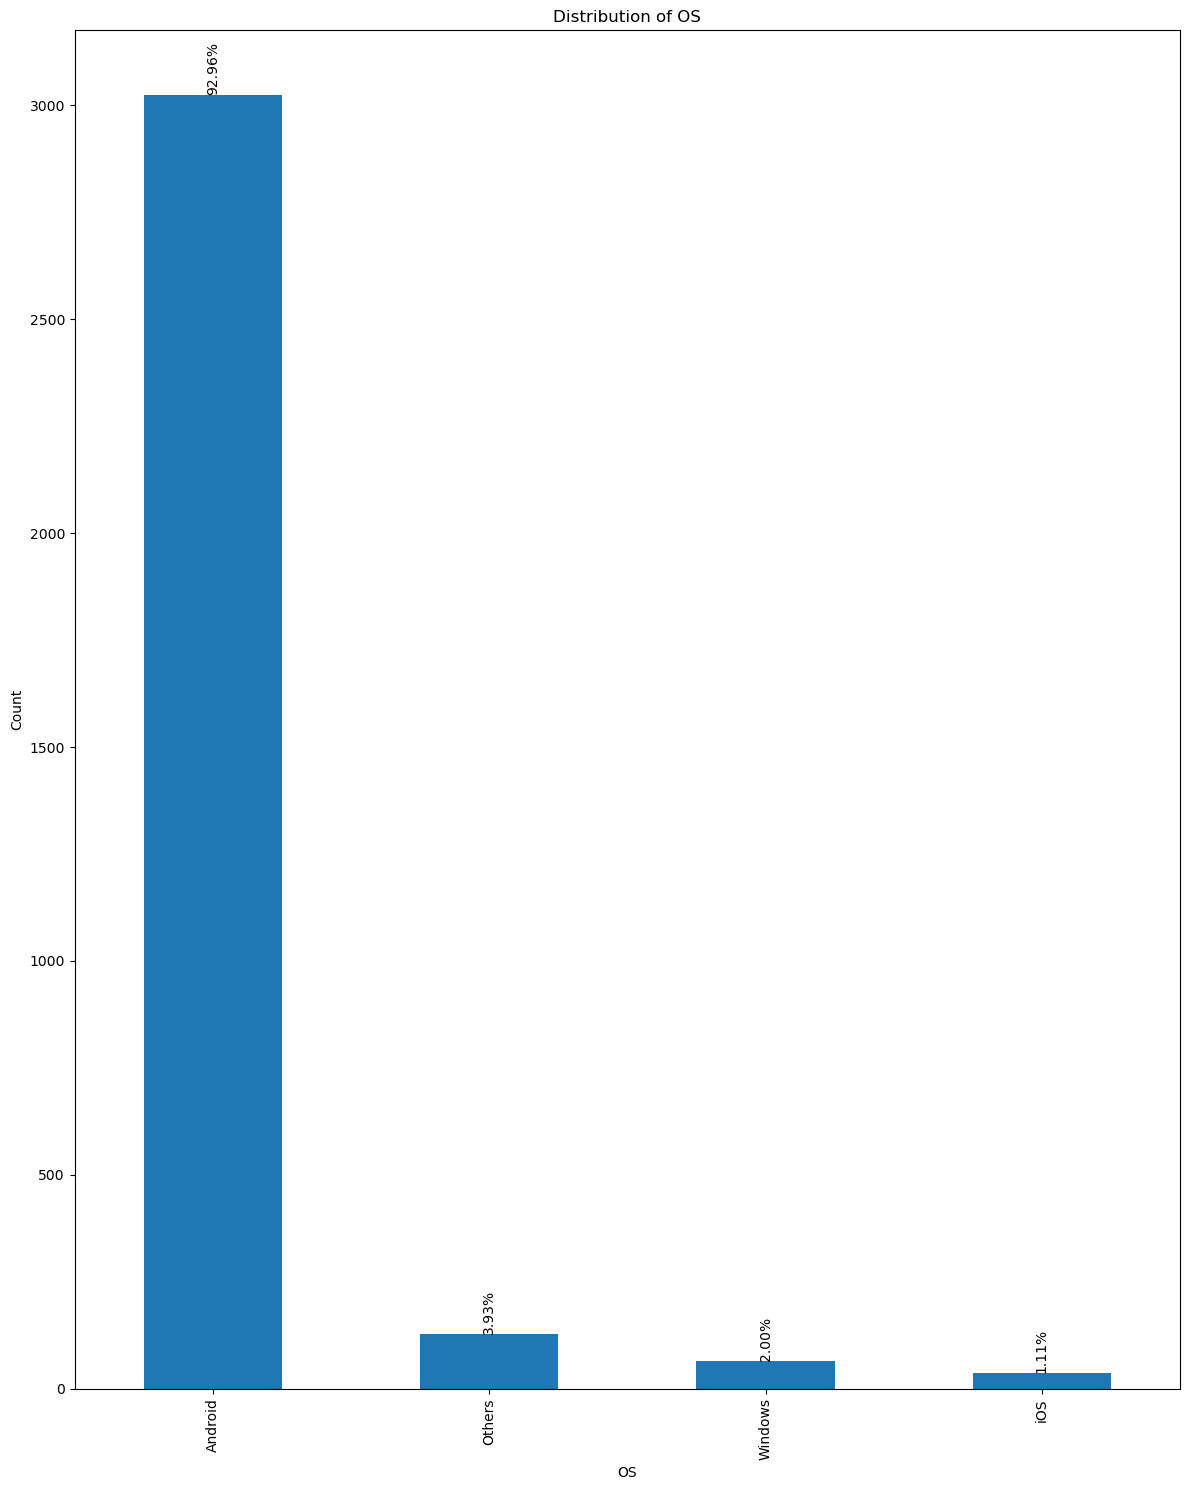

In [22]:
brand_total = df1['os'].value_counts()
brand_descending = brand_total.sort_values(ascending = False)
brand_percentage = (brand_descending / brand_descending.sum()) * 100
plt.figure(figsize = (12, 15))
brand_descending.plot(kind = 'bar')
for i, v in enumerate(brand_descending):
    plt.text(i, v + 0.5, f'{brand_percentage[i]:.2f}%', ha='center', va='bottom', rotation=90)
plt.title('Distribution of OS')
plt.xlabel('OS')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

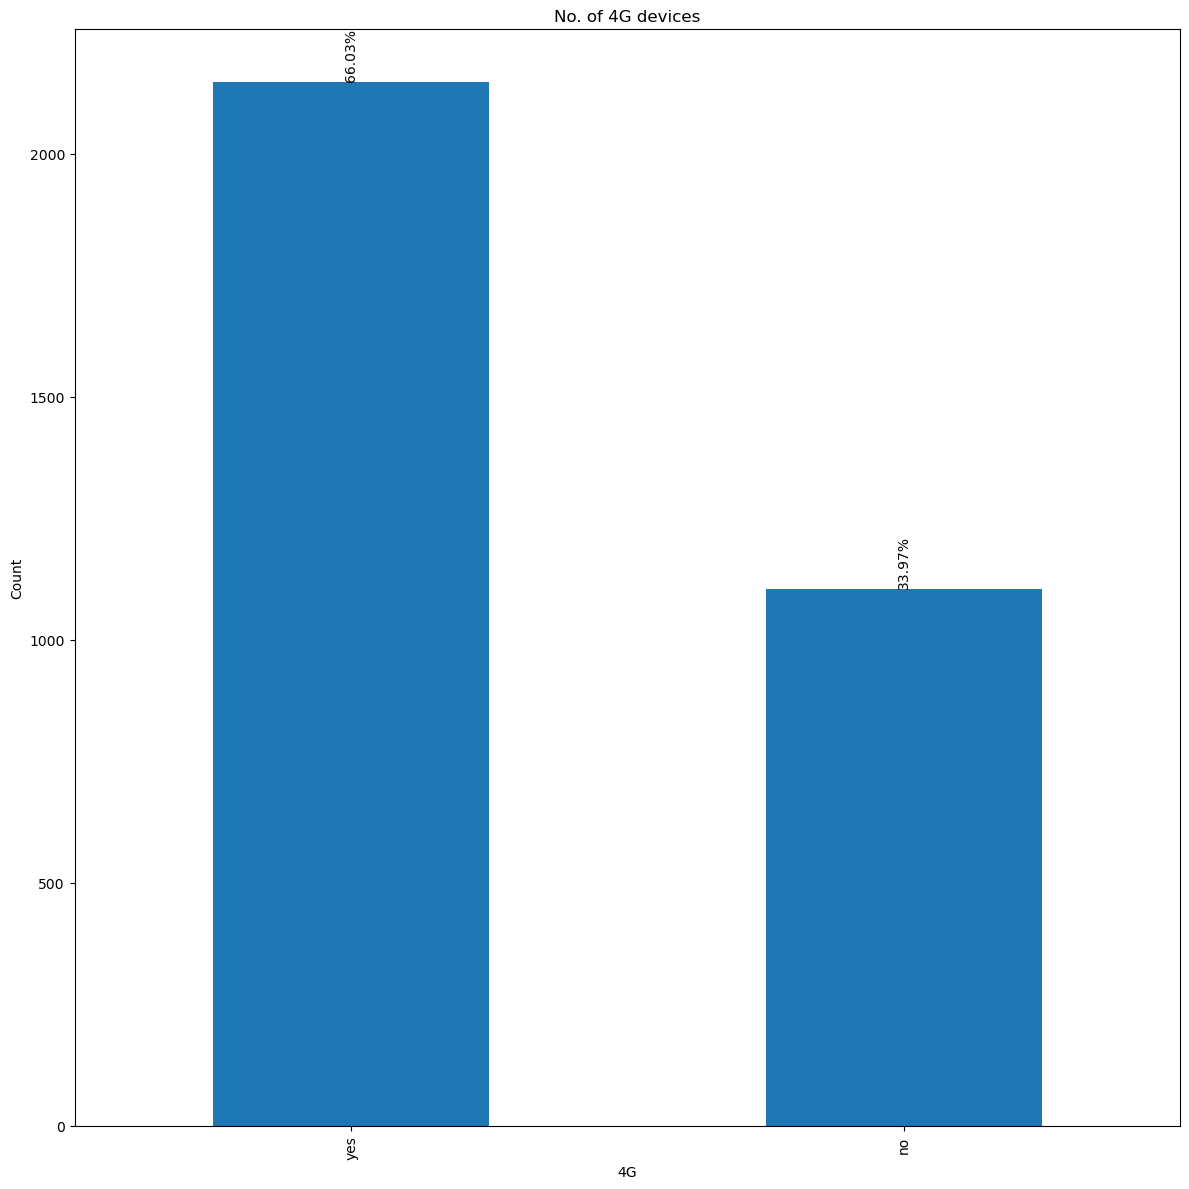

In [23]:
brand_total = df1['4g'].value_counts()
brand_descending = brand_total.sort_values(ascending = False)
brand_percentage = (brand_descending / brand_descending.sum()) * 100
plt.figure(figsize = (12, 12))
brand_descending.plot(kind = 'bar')
for i, v in enumerate(brand_descending):
    plt.text(i, v + 0.5, f'{brand_percentage[i]:.2f}%', ha='center', va='bottom', rotation=90)
plt.title('No. of 4G devices')
plt.xlabel('4G')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

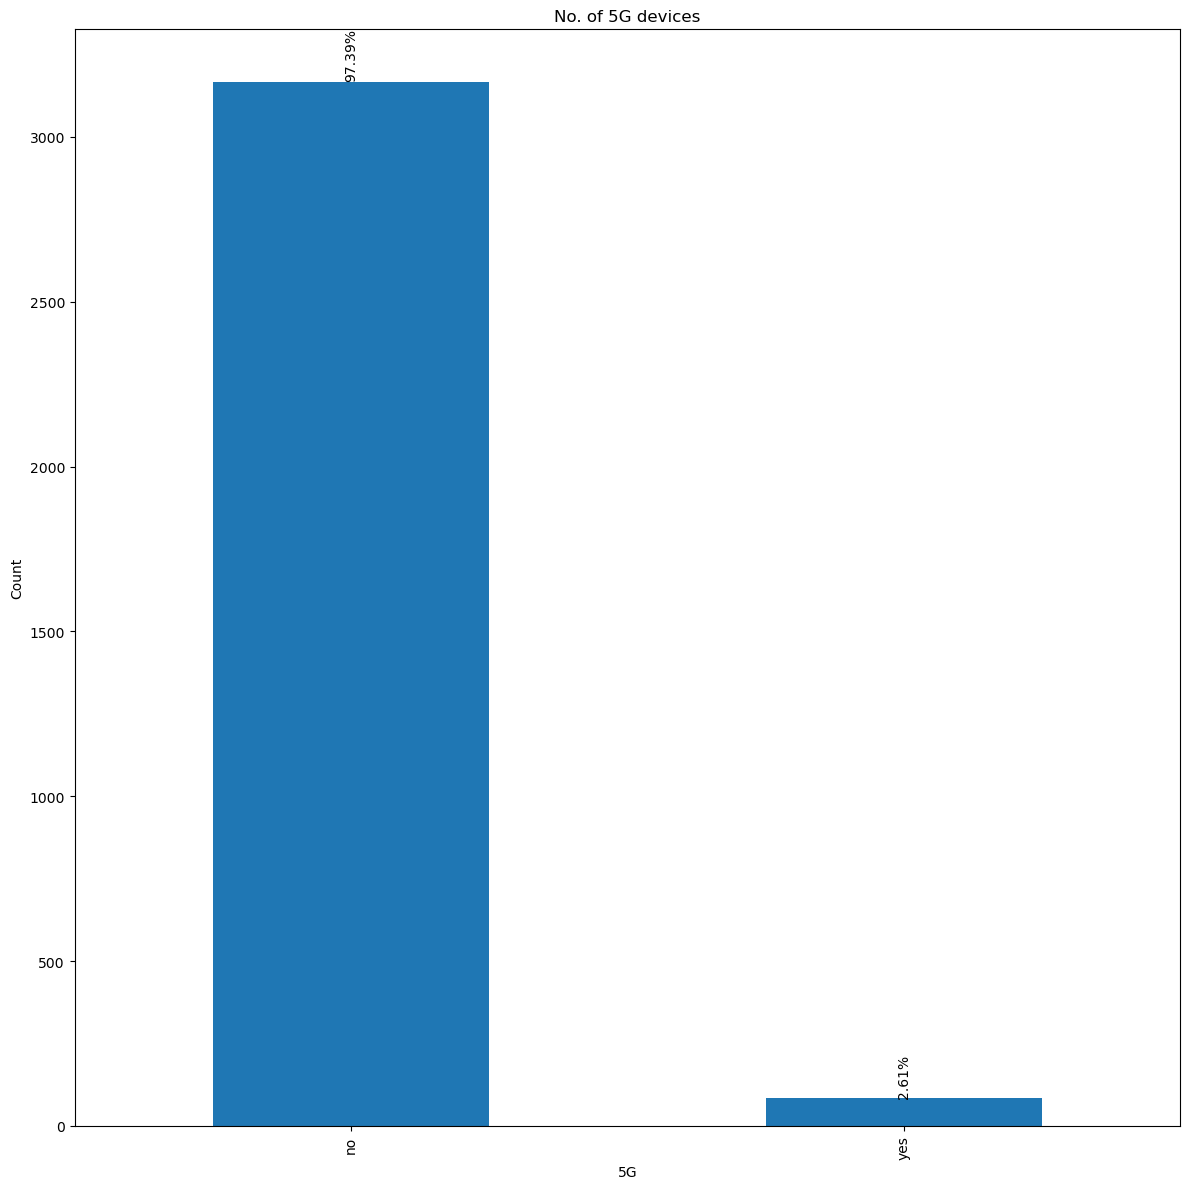

In [24]:
brand_total = df1['5g'].value_counts()
brand_descending = brand_total.sort_values(ascending = False)
brand_percentage = (brand_descending / brand_descending.sum()) * 100
plt.figure(figsize = (12, 12))
brand_descending.plot(kind = 'bar')
for i, v in enumerate(brand_descending):
    plt.text(i, v + 0.5, f'{brand_percentage[i]:.2f}%', ha='center', va='bottom', rotation=90)
plt.title('No. of 5G devices')
plt.xlabel('5G')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

## Exploration of relationship between Normalized Prices for each Brand

C:\Users\STSC\AppData\Local\Temp\ipykernel_10384\3386409654.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


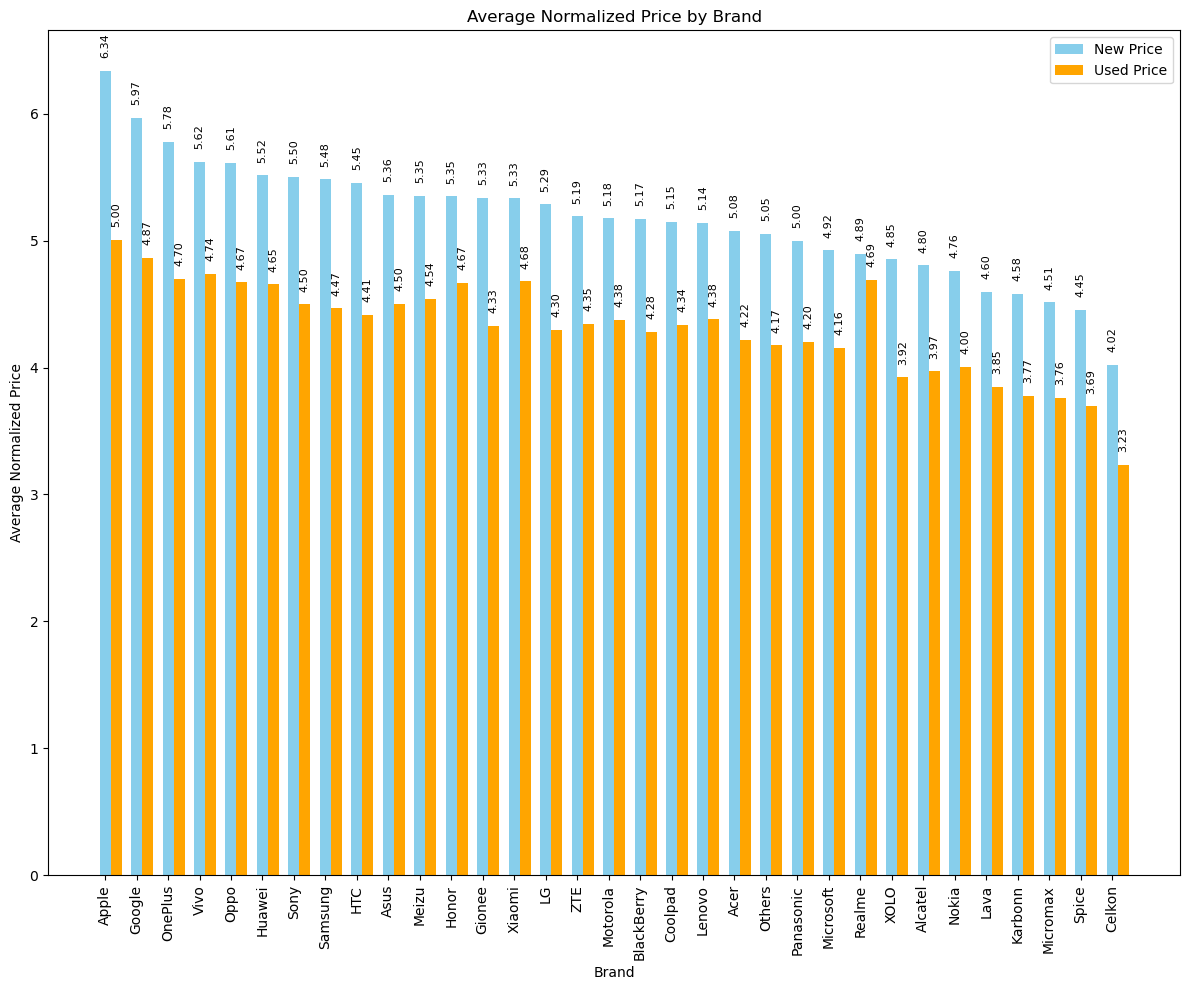

In [25]:
new_price_stats = df1.groupby('device_brand')['normalized_new_price'].mean()  
used_price_stats = df1.groupby('device_brand')['normalized_used_price'].mean()  
new_price_descending = new_price_stats.sort_values(ascending=False)
used_price_descending = used_price_stats.reindex(new_price_descending.index)
plt.figure(figsize=(12, 10))
bar_width = 0.35
plt.bar(range(len(new_price_descending)), new_price_descending, width=bar_width, color='skyblue', label='New Price')
plt.bar([x + bar_width for x in range(len(used_price_descending))], used_price_descending, width=bar_width, color='orange', label='Used Price')
plt.title('Average Normalized Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Normalized Price')
plt.xticks(range(len(new_price_descending)), new_price_descending.index, rotation=90)
plt.legend()
plt.tight_layout()
for i, v in enumerate(new_price_descending):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', rotation=90, fontsize=8)
for i, v in enumerate(used_price_descending):
    plt.text(i + bar_width, v + 0.1, f'{v:.2f}', ha='center', va='bottom', rotation=90, fontsize=8)
plt.tight_layout()
plt.show()


## Exploration of relationship between Normalized Prices for each OS

C:\Users\STSC\AppData\Local\Temp\ipykernel_10384\3914504316.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


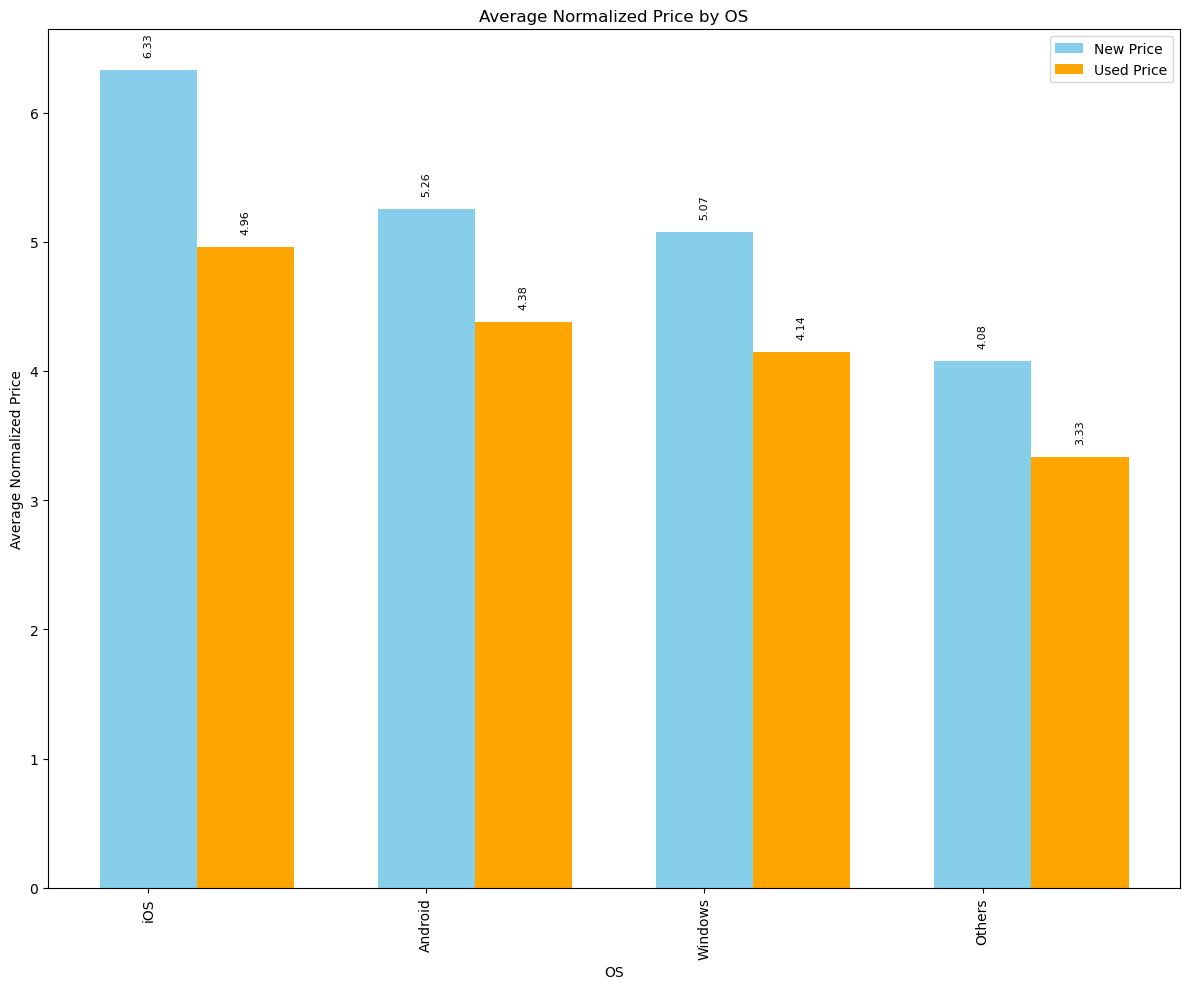

In [26]:
new_price_stats = df1.groupby('os')['normalized_new_price'].mean()  
used_price_stats = df1.groupby('os')['normalized_used_price'].mean()  
new_price_descending = new_price_stats.sort_values(ascending=False)
used_price_descending = used_price_stats.reindex(new_price_descending.index)
plt.figure(figsize=(12, 10))
bar_width = 0.35
plt.bar(range(len(new_price_descending)), new_price_descending, width=bar_width, color='skyblue', label='New Price')
plt.bar([x + bar_width for x in range(len(used_price_descending))], used_price_descending, width=bar_width, color='orange', label='Used Price')
plt.title('Average Normalized Price by OS')
plt.xlabel('OS')
plt.ylabel('Average Normalized Price')
plt.xticks(range(len(new_price_descending)), new_price_descending.index, rotation=90)
plt.legend()
plt.tight_layout()
for i, v in enumerate(new_price_descending):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', rotation=90, fontsize=8)
for i, v in enumerate(used_price_descending):
    plt.text(i + bar_width, v + 0.1, f'{v:.2f}', ha='center', va='bottom', rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

## Exploration of relationship between Normalized Prices for 4G Devices

C:\Users\STSC\AppData\Local\Temp\ipykernel_10384\529317714.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


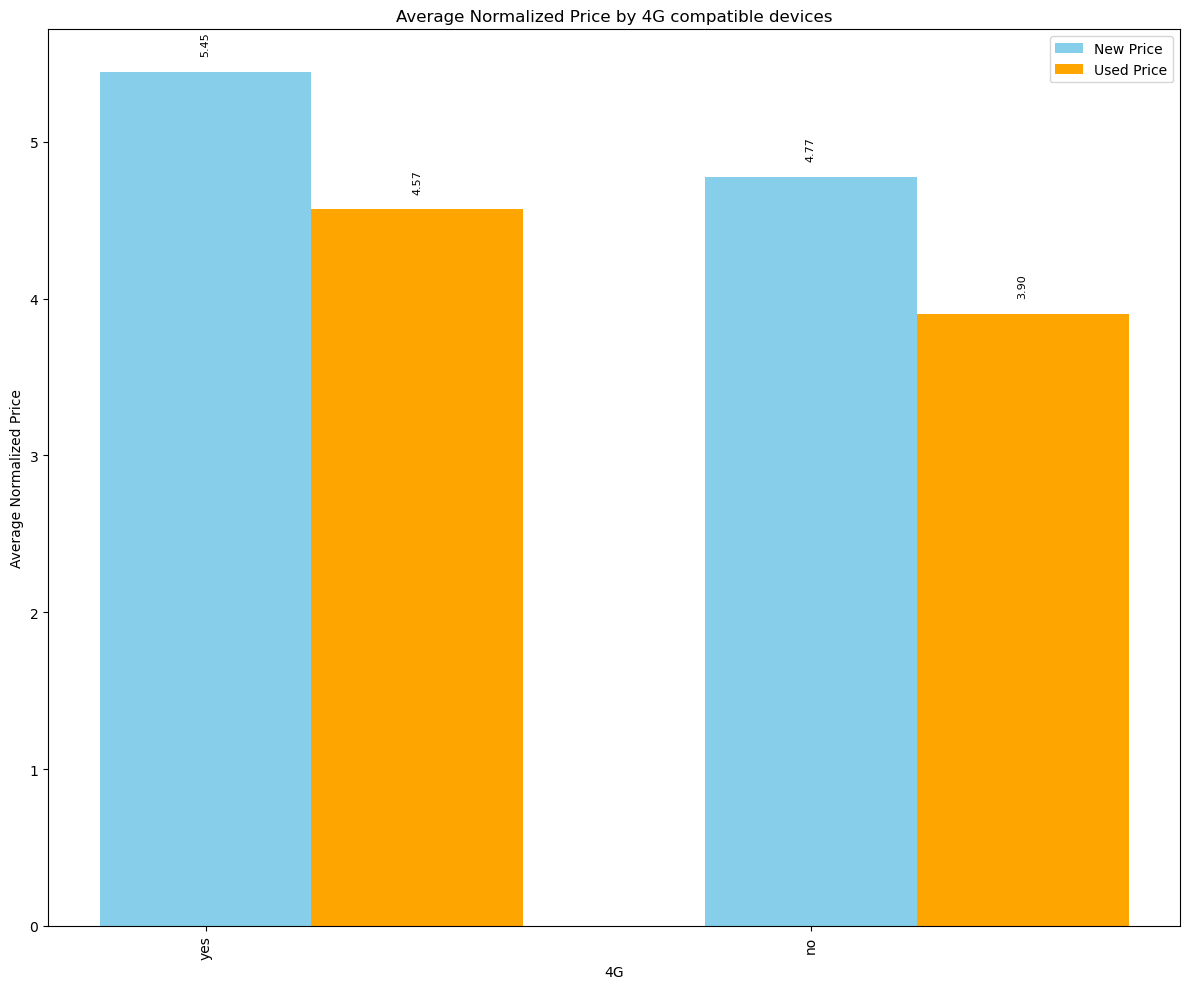

In [27]:
new_price_stats = df1.groupby('4g')['normalized_new_price'].mean()  
used_price_stats = df1.groupby('4g')['normalized_used_price'].mean()  
new_price_descending = new_price_stats.sort_values(ascending=False)
used_price_descending = used_price_stats.reindex(new_price_descending.index)
plt.figure(figsize=(12, 10))
bar_width = 0.35
plt.bar(range(len(new_price_descending)), new_price_descending, width=bar_width, color='skyblue', label='New Price')
plt.bar([x + bar_width for x in range(len(used_price_descending))], used_price_descending, width=bar_width, color='orange', label='Used Price')
plt.title('Average Normalized Price by 4G compatible devices')
plt.xlabel('4G')
plt.ylabel('Average Normalized Price')
plt.xticks(range(len(new_price_descending)), new_price_descending.index, rotation=90)
plt.legend()
plt.tight_layout()
for i, v in enumerate(new_price_descending):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', rotation=90, fontsize=8)
for i, v in enumerate(used_price_descending):
    plt.text(i + bar_width, v + 0.1, f'{v:.2f}', ha='center', va='bottom', rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

## Exploration of relationship between Normalized Prices for 5G Devices

C:\Users\STSC\AppData\Local\Temp\ipykernel_10384\2263593477.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


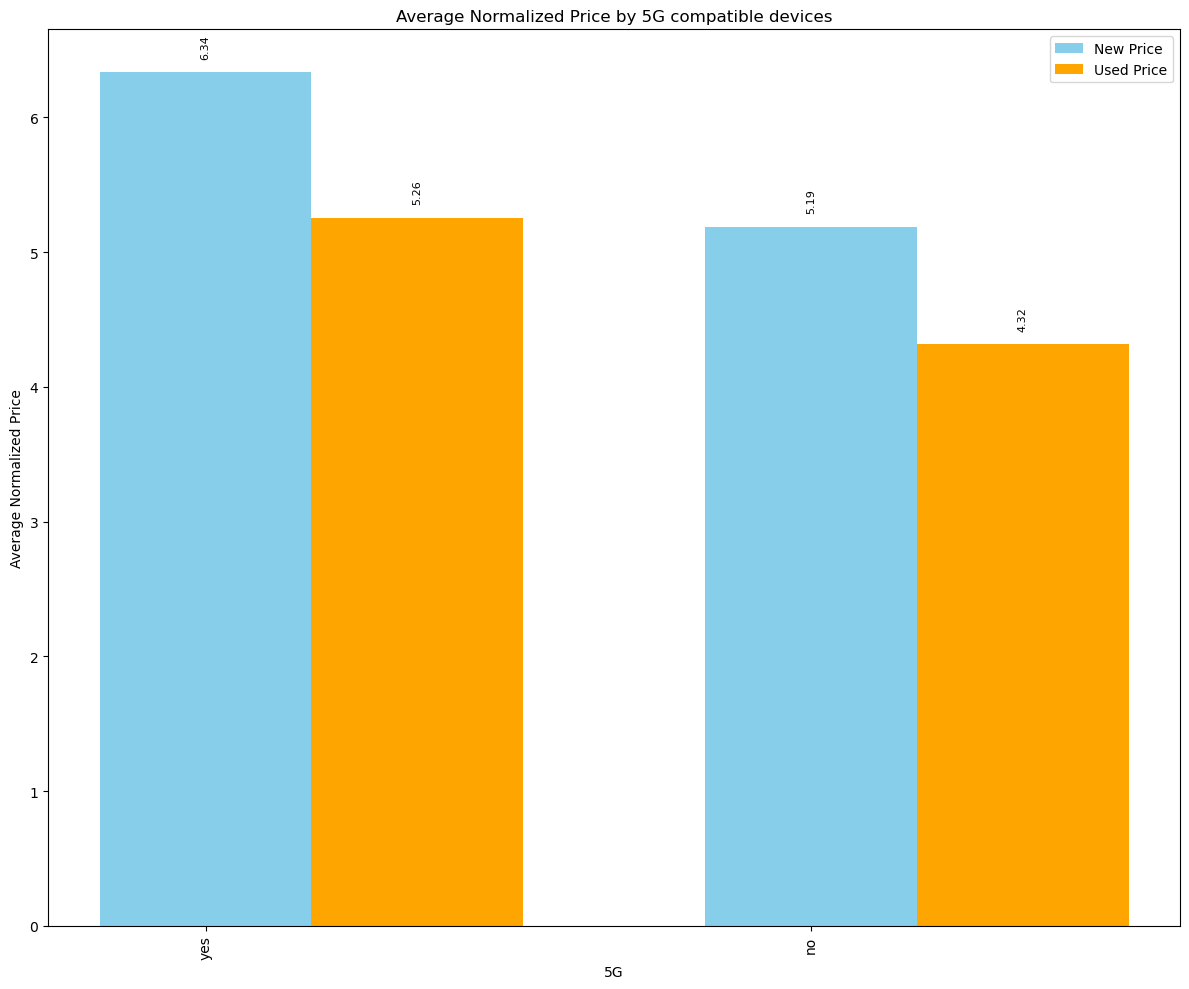

In [28]:
new_price_stats = df1.groupby('5g')['normalized_new_price'].mean()  
used_price_stats = df1.groupby('5g')['normalized_used_price'].mean()  
new_price_descending = new_price_stats.sort_values(ascending=False)
used_price_descending = used_price_stats.reindex(new_price_descending.index)
plt.figure(figsize=(12, 10))
bar_width = 0.35
plt.bar(range(len(new_price_descending)), new_price_descending, width=bar_width, color='skyblue', label='New Price')
plt.bar([x + bar_width for x in range(len(used_price_descending))], used_price_descending, width=bar_width, color='orange', label='Used Price')
plt.title('Average Normalized Price by 5G compatible devices')
plt.xlabel('5G')
plt.ylabel('Average Normalized Price')
plt.xticks(range(len(new_price_descending)), new_price_descending.index, rotation=90)
plt.legend()
plt.tight_layout()
for i, v in enumerate(new_price_descending):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', rotation=90, fontsize=8)
for i, v in enumerate(used_price_descending):
    plt.text(i + bar_width, v + 0.1, f'{v:.2f}', ha='center', va='bottom', rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

## Exploration of relationship between Normalized Prices for Release Year

C:\Users\STSC\AppData\Local\Temp\ipykernel_10384\1285826129.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


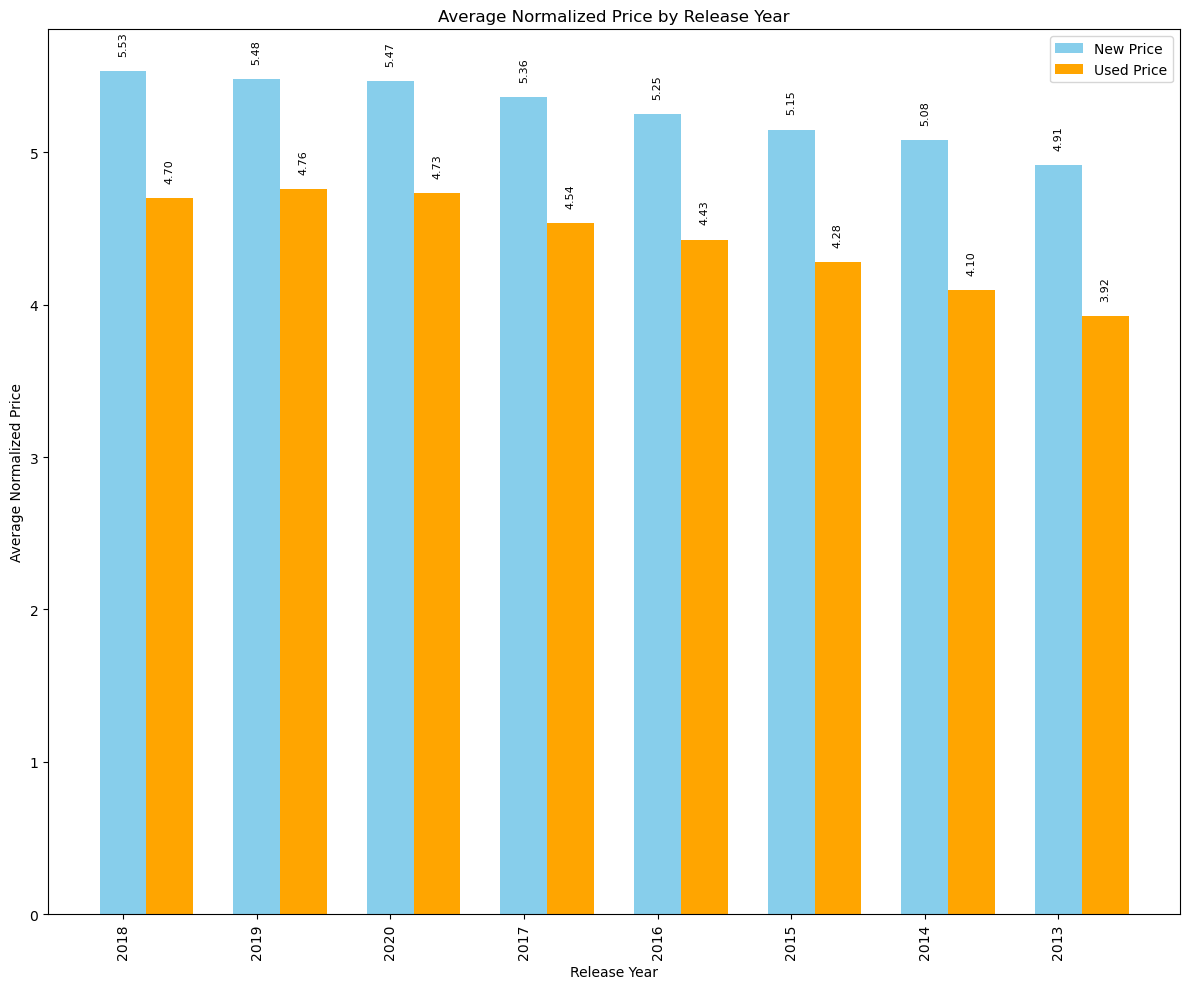

In [29]:
new_price_stats = df1.groupby('release_year')['normalized_new_price'].mean()  
used_price_stats = df1.groupby('release_year')['normalized_used_price'].mean()  
new_price_descending = new_price_stats.sort_values(ascending=False)
used_price_descending = used_price_stats.reindex(new_price_descending.index)
plt.figure(figsize=(12, 10))
bar_width = 0.35
plt.bar(range(len(new_price_descending)), new_price_descending, width=bar_width, color='skyblue', label='New Price')
plt.bar([x + bar_width for x in range(len(used_price_descending))], used_price_descending, width=bar_width, color='orange', label='Used Price')
plt.title('Average Normalized Price by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Normalized Price')
plt.xticks(range(len(new_price_descending)), new_price_descending.index, rotation=90)
plt.legend()
plt.tight_layout()
for i, v in enumerate(new_price_descending):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom', rotation=90, fontsize=8)
for i, v in enumerate(used_price_descending):
    plt.text(i + bar_width, v + 0.1, f'{v:.2f}', ha='center', va='bottom', rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

## Exploration of relationship between 'Normalized Prices' and No. of days the device was used

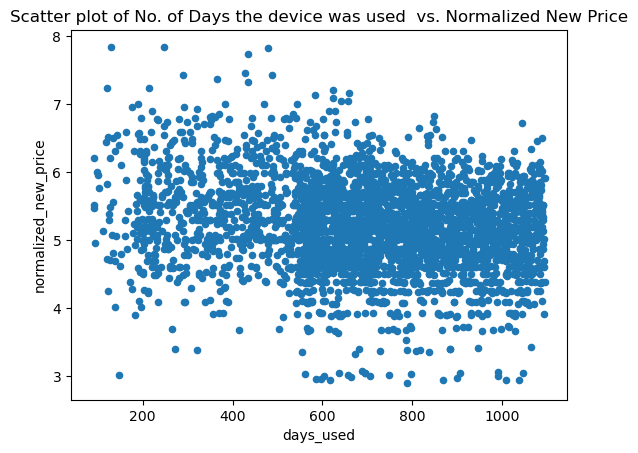

In [30]:
df1.plot.scatter(x='days_used', y='normalized_new_price', legend=False)
plt.title("Scatter plot of No. of Days the device was used  vs. Normalized New Price")
plt.show()

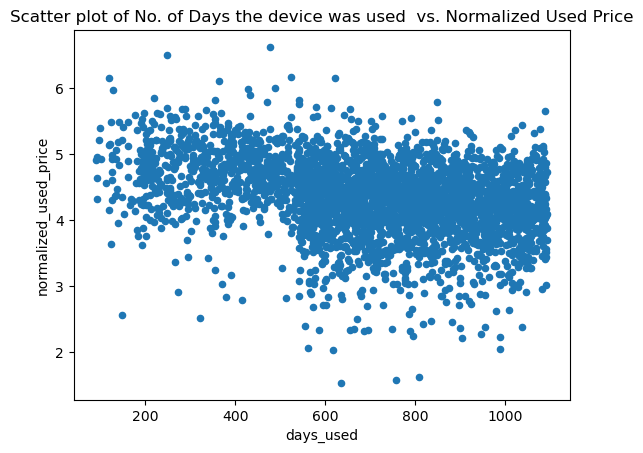

In [31]:
df1.plot.scatter(x='days_used', y='normalized_used_price', legend=False)
plt.title("Scatter plot of No. of Days the device was used  vs. Normalized Used Price")
plt.show()

## Exploration of relationship between Normalized Prices and Screen Size

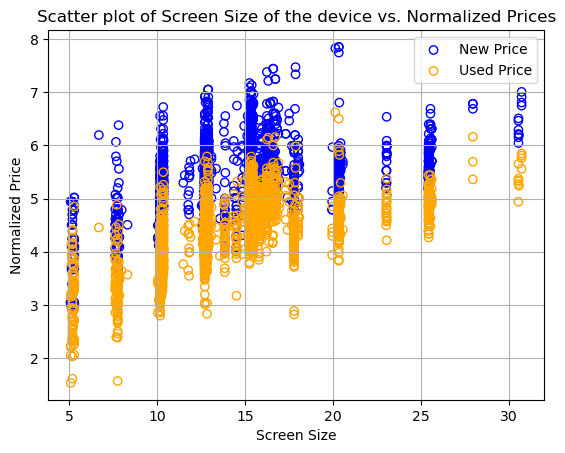

In [32]:
plt.scatter(x=df1['screen_size'], y=df1['normalized_new_price'], color='none', edgecolor= 'blue', label='New Price')
plt.scatter(x=df1['screen_size'], y=df1['normalized_used_price'], color='none', edgecolor='orange', label='Used Price')
plt.title("Scatter plot of Screen Size of the device vs. Normalized Prices")
plt.xlabel("Screen Size")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()

## Exploration of relationship between Normalized Prices and Rear Camera MP

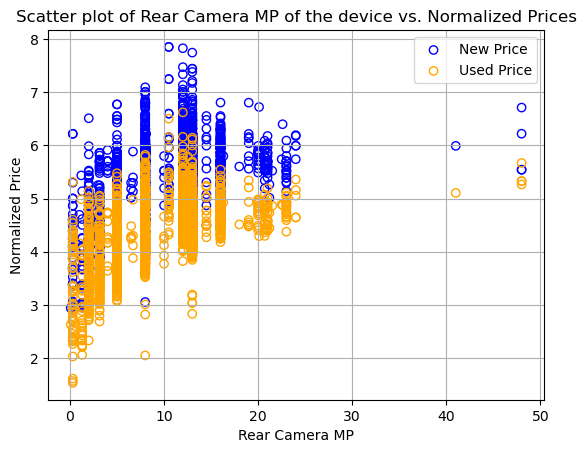

In [33]:
plt.scatter(x=df1['rear_camera_mp'], y=df1['normalized_new_price'], color='none', edgecolor= 'blue', label='New Price')
plt.scatter(x=df1['rear_camera_mp'], y=df1['normalized_used_price'], color='none', edgecolor='orange', label='Used Price')
plt.title("Scatter plot of Rear Camera MP of the device vs. Normalized Prices")
plt.xlabel("Rear Camera MP")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()

## Exploration of relationship between Normalized Prices and Front Camera MP

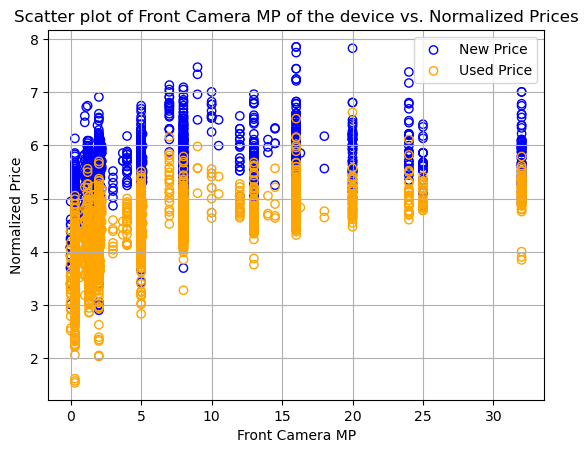

In [34]:
plt.scatter(x=df1['front_camera_mp'], y=df1['normalized_new_price'], color='none', edgecolor= 'blue', label='New Price')
plt.scatter(x=df1['front_camera_mp'], y=df1['normalized_used_price'], color='none', edgecolor='orange', label='Used Price')
plt.title("Scatter plot of Front Camera MP of the device vs. Normalized Prices")
plt.xlabel("Front Camera MP")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()

## Exploration of relationship between Normalized Prices and Internal Memory

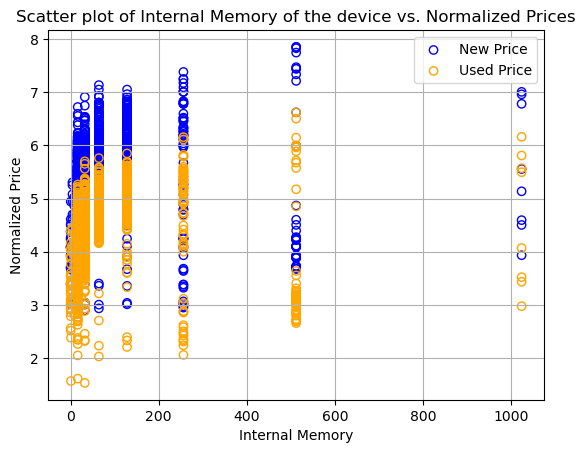

In [35]:
plt.scatter(x=df1['internal_memory'], y=df1['normalized_new_price'], color='none', edgecolor= 'blue', label='New Price')
plt.scatter(x=df1['internal_memory'], y=df1['normalized_used_price'], color='none', edgecolor='orange', label='Used Price')
plt.title("Scatter plot of Internal Memory of the device vs. Normalized Prices")
plt.xlabel("Internal Memory")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()

## Exploration of relationship between Normalized Prices and RAM

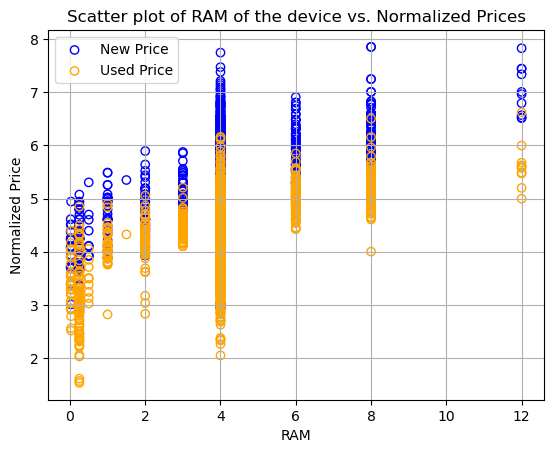

In [36]:
plt.scatter(x=df1['ram'], y=df1['normalized_new_price'], color='none', edgecolor= 'blue', label='New Price')
plt.scatter(x=df1['ram'], y=df1['normalized_used_price'], color='none', edgecolor='orange', label='Used Price')
plt.title("Scatter plot of RAM of the device vs. Normalized Prices")
plt.xlabel("RAM")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()

## Exploration of relationship between Normalized Prices and Battery

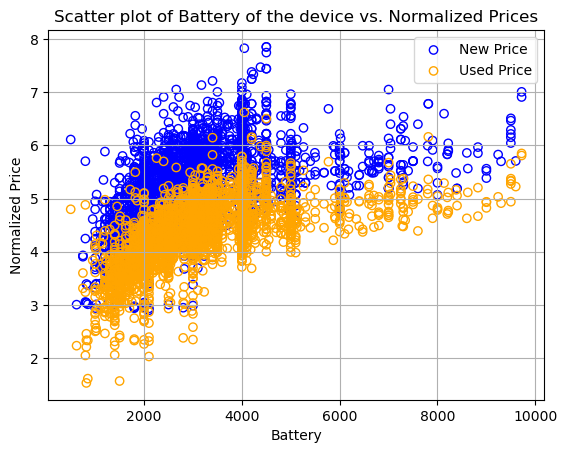

In [37]:
plt.scatter(x=df1['battery'], y=df1['normalized_new_price'], color='none', edgecolor= 'blue', label='New Price')
plt.scatter(x=df1['battery'], y=df1['normalized_used_price'], color='none', edgecolor='orange', label='Used Price')
plt.title("Scatter plot of Battery of the device vs. Normalized Prices")
plt.xlabel("Battery")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()

## Exploration of relationship between Normalized Prices and Weight

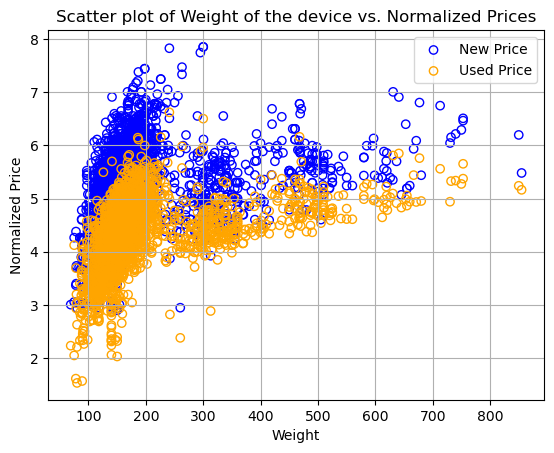

In [38]:
plt.scatter(x=df1['weight'], y=df1['normalized_new_price'], color='none', edgecolor= 'blue', label='New Price')
plt.scatter(x=df1['weight'], y=df1['normalized_used_price'], color='none', edgecolor='orange', label='Used Price')
plt.title("Scatter plot of Weight of the device vs. Normalized Prices")
plt.xlabel("Weight")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()

## Exploration of relationship between 'Normalized New Price' and 4G/ 5G Devices

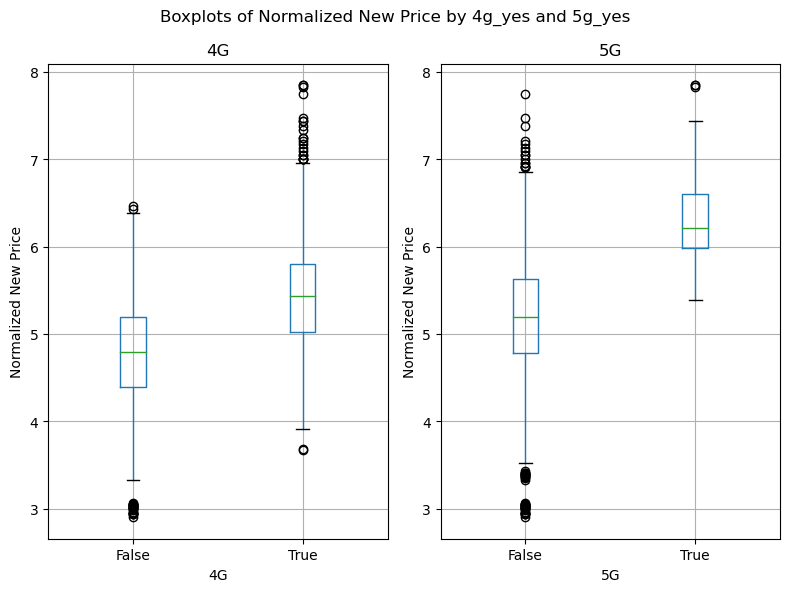

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,6))
new_df.boxplot(column='normalized_new_price', by='4g_yes', ax=axes[0])
axes[0].set_title('4G')
axes[0].set_xlabel('4G')
axes[0].set_ylabel('Normalized New Price')

new_df.boxplot(column='normalized_new_price', by='5g_yes', ax=axes[1])
axes[1].set_title('5G')
axes[1].set_xlabel('5G')
axes[1].set_ylabel('Normalized New Price')

plt.suptitle('Boxplots of Normalized New Price by 4g_yes and 5g_yes')
plt.tight_layout()
plt.show()

## Heatmap

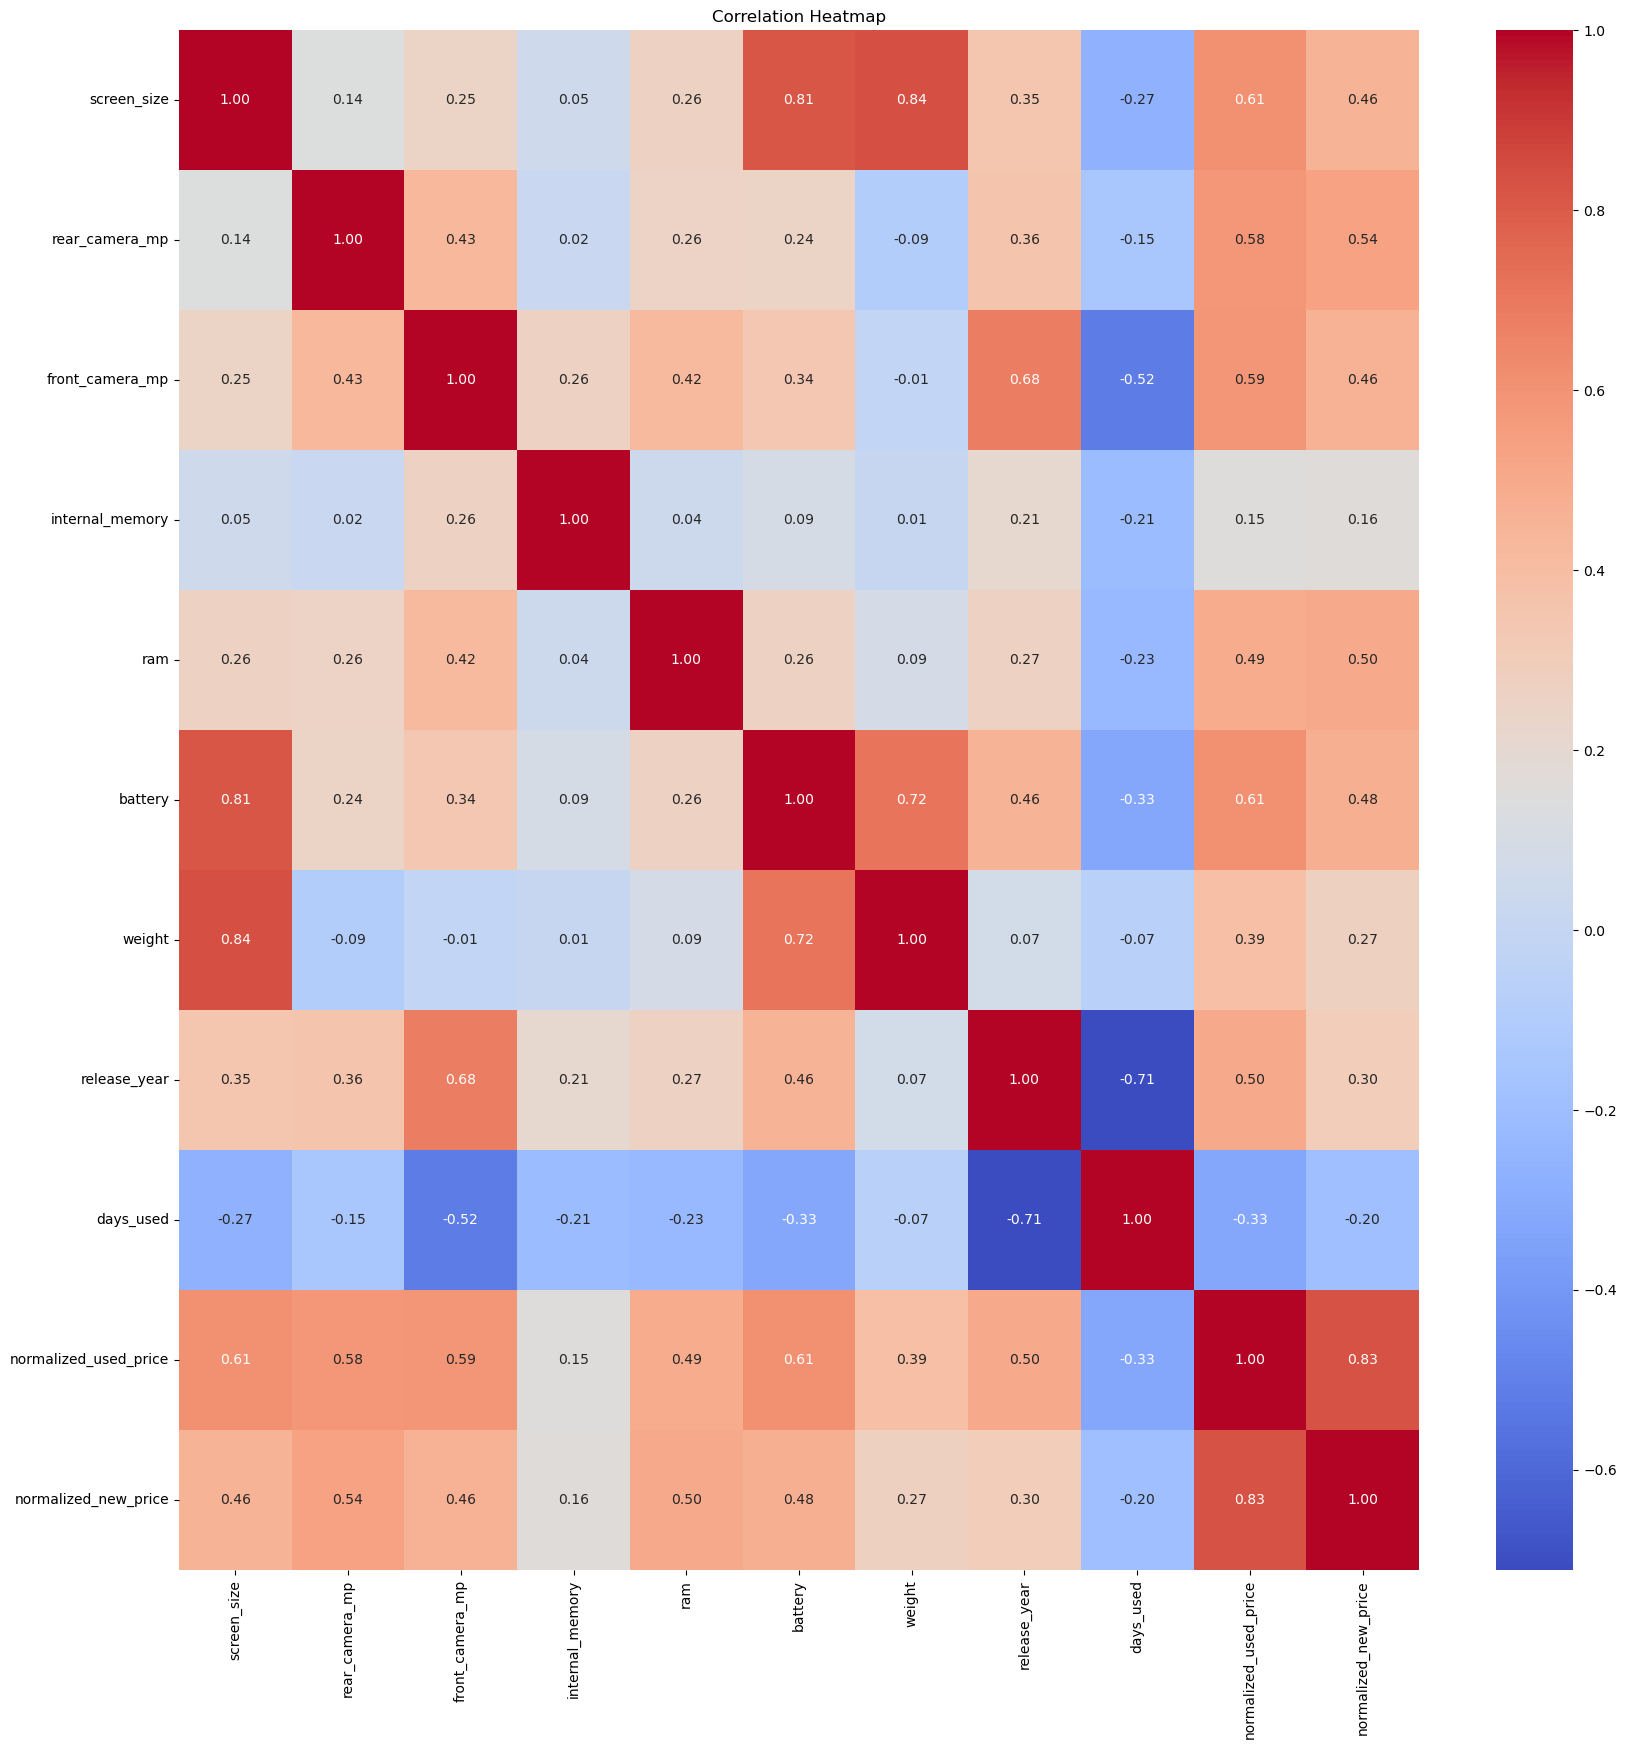

In [40]:
# Heatmap Table
df_num = df1.drop(columns=['device_brand', 'os', '4g', '5g'])
correl = df_num.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correl, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Regression

In [309]:
#Load the dataset. View the head
new_df.columns

Index(['screen_size', 'rear_camera_mp', 'front_camera_mp', 'internal_memory',
       'ram', 'battery', 'weight', 'release_year', 'days_used',
       'normalized_used_price', 'normalized_new_price', 'device_brand_Alcatel',
       'device_brand_Apple', 'device_brand_Asus', 'device_brand_BlackBerry',
       'device_brand_Celkon', 'device_brand_Coolpad', 'device_brand_Gionee',
       'device_brand_Google', 'device_brand_HTC', 'device_brand_Honor',
       'device_brand_Huawei', 'device_brand_Karbonn', 'device_brand_LG',
       'device_brand_Lava', 'device_brand_Lenovo', 'device_brand_Meizu',
       'device_brand_Micromax', 'device_brand_Microsoft',
       'device_brand_Motorola', 'device_brand_Nokia', 'device_brand_OnePlus',
       'device_brand_Oppo', 'device_brand_Others', 'device_brand_Panasonic',
       'device_brand_Realme', 'device_brand_Samsung', 'device_brand_Sony',
       'device_brand_Spice', 'device_brand_Vivo', 'device_brand_XOLO',
       'device_brand_Xiaomi', 'device_brand_ZTE

In [310]:
new_df = new_df.rename(columns={'4g_yes': 'four_g', '5g_yes': 'five_g'})
new_df.columns

Index(['screen_size', 'rear_camera_mp', 'front_camera_mp', 'internal_memory',
       'ram', 'battery', 'weight', 'release_year', 'days_used',
       'normalized_used_price', 'normalized_new_price', 'device_brand_Alcatel',
       'device_brand_Apple', 'device_brand_Asus', 'device_brand_BlackBerry',
       'device_brand_Celkon', 'device_brand_Coolpad', 'device_brand_Gionee',
       'device_brand_Google', 'device_brand_HTC', 'device_brand_Honor',
       'device_brand_Huawei', 'device_brand_Karbonn', 'device_brand_LG',
       'device_brand_Lava', 'device_brand_Lenovo', 'device_brand_Meizu',
       'device_brand_Micromax', 'device_brand_Microsoft',
       'device_brand_Motorola', 'device_brand_Nokia', 'device_brand_OnePlus',
       'device_brand_Oppo', 'device_brand_Others', 'device_brand_Panasonic',
       'device_brand_Realme', 'device_brand_Samsung', 'device_brand_Sony',
       'device_brand_Spice', 'device_brand_Vivo', 'device_brand_XOLO',
       'device_brand_Xiaomi', 'device_brand_ZTE

In [311]:
#Run a regression between normalized_new_price and normalized_used_price
#Using Stats models
formula = 'normalized_new_price ~ normalized_used_price'
df_lm = sm.ols(formula=formula, data=new_df).fit()
print(df_lm.summary())

                             OLS Regression Results                             
Dep. Variable:     normalized_new_price   R-squared:                       0.692
Model:                              OLS   Adj. R-squared:                  0.692
Method:                   Least Squares   F-statistic:                     7299.
Date:                  Thu, 07 Mar 2024   Prob (F-statistic):               0.00
Time:                          00:00:14   Log-Likelihood:                -1406.5
No. Observations:                  3253   AIC:                             2817.
Df Residuals:                      3251   BIC:                             2829.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

In [312]:
predictors = ['screen_size', 'rear_camera_mp', 'front_camera_mp', 'internal_memory',
       'ram', 'battery', 'weight', 'release_year', 'days_used',
       'normalized_used_price', 'device_brand_Alcatel',
       'device_brand_Apple', 'device_brand_Asus', 'device_brand_BlackBerry',
       'device_brand_Celkon', 'device_brand_Coolpad', 'device_brand_Gionee',
       'device_brand_Google', 'device_brand_HTC', 'device_brand_Honor',
       'device_brand_Huawei', 'device_brand_Karbonn', 'device_brand_LG',
       'device_brand_Lava', 'device_brand_Lenovo', 'device_brand_Meizu',
       'device_brand_Micromax', 'device_brand_Microsoft',
       'device_brand_Motorola', 'device_brand_Nokia', 'device_brand_OnePlus',
       'device_brand_Oppo', 'device_brand_Others', 'device_brand_Panasonic',
       'device_brand_Realme', 'device_brand_Samsung', 'device_brand_Sony',
       'device_brand_Spice', 'device_brand_Vivo', 'device_brand_XOLO',
       'device_brand_Xiaomi', 'device_brand_ZTE', 'os_Others', 'os_Windows',
       'os_iOS', 'four_g', 'five_g']
outcome = 'normalized_new_price'
# partition data
X = new_df[predictors]
y = new_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

df_lm = LinearRegression()
df_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', df_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': df_lm.coef_}))

# print performance measures
regressionSummary(train_y, df_lm.predict(train_X))

intercept  184.77897553140332
                  Predictor  coefficient
0               screen_size     0.010879
1            rear_camera_mp     0.013083
2           front_camera_mp     0.002581
3           internal_memory     0.000624
4                       ram     0.058293
5                   battery     0.000064
6                    weight    -0.001182
7              release_year    -0.091138
8                 days_used    -0.000013
9     normalized_used_price     0.814067
10     device_brand_Alcatel     0.032398
11       device_brand_Apple     0.556464
12        device_brand_Asus     0.031709
13  device_brand_BlackBerry    -0.048459
14      device_brand_Celkon    -0.220185
15     device_brand_Coolpad    -0.024251
16      device_brand_Gionee     0.088234
17      device_brand_Google     0.434144
18         device_brand_HTC     0.100064
19       device_brand_Honor    -0.138435
20      device_brand_Huawei     0.057904
21     device_brand_Karbonn    -0.191182
22          device_brand_LG

## Prediction for Validation Data

In [313]:
pred_y = df_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, df_lm))
print('AIC : ', AIC_score(train_y, pred_y, df_lm))
print('BIC : ', BIC_score(train_y, pred_y, df_lm))

adjusted r2 :  0.7830571696133681
AIC :  1109.795202464824
BIC :  1383.0239721553562


## Measuring the performance on Validation Set

In [314]:
# Use predict() to make predictions on new set
df_lm_pred = df_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': df_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - df_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, df_lm_pred)

      Predicted    Actual  Residual
2102   4.254386  4.382527  0.128141
1063   5.851125  5.831325 -0.019800
376    5.502778  5.401641 -0.101137
1386   5.934313  5.803326 -0.130986
1190   5.558141  6.174973  0.616832
783    4.929893  4.874586 -0.055307
1141   5.288887  6.194773  0.905886
627    5.224093  5.304349  0.080256
1870   5.110460  5.007230 -0.103230
1511   5.730752  6.113726  0.382975
2874   5.730823  5.703516 -0.027307
900    5.287902  5.442028  0.154126
895    4.522373  4.397162 -0.125211
891    4.879760  4.606569 -0.273191
3159   5.029417  5.138501  0.109083
706    5.320420  5.523818  0.203399
1917   4.484059  4.505239  0.021180
1449   5.165806  5.005288 -0.160518
2652   5.392529  5.700845  0.308316
2870   5.279750  4.862754 -0.416996

Regression statistics

                      Mean Error (ME) : 0.0090
       Root Mean Squared Error (RMSE) : 0.3196
            Mean Absolute Error (MAE) : 0.2435
          Mean Percentage Error (MPE) : -0.1283
Mean Absolute Percentage Error 

## Plotting the residuals

Determine the residuals and create a histogram

0.7572964669738863


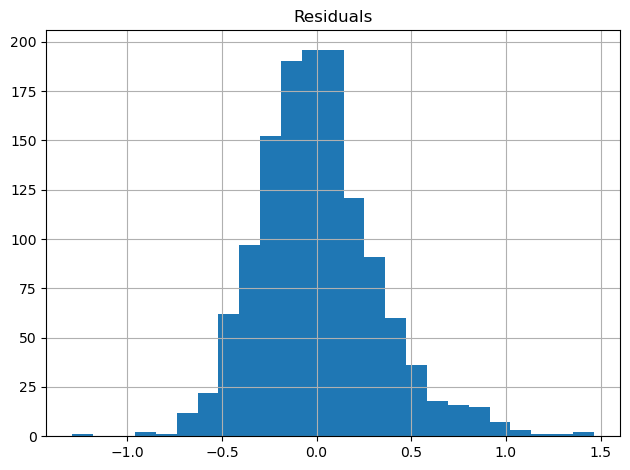

In [315]:
df_lm_pred = df_lm.predict(valid_X)
all_residuals = valid_y - df_lm_pred

# Determine the percentage of datapoints with a residual in [-0.34, 0.34] = approx. 75\%
print(len(all_residuals[(all_residuals > -0.34) & (all_residuals < 0.34)]) / len(all_residuals))

ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

plt.tight_layout()
plt.show()

### Statistical Models

In [316]:
# Run a linear regression of "normalized_new_price" on the remaining predictors in the training set
train_df = train_X.join(train_y)

predictors = train_X.columns
formula = 'normalized_new_price ~ ' + ' + '.join(predictors)


df_lm = sm.ols(formula=formula, data=train_df).fit()
print(df_lm.summary())

                             OLS Regression Results                             
Dep. Variable:     normalized_new_price   R-squared:                       0.788
Model:                              OLS   Adj. R-squared:                  0.783
Method:                   Least Squares   F-statistic:                     150.8
Date:                  Thu, 07 Mar 2024   Prob (F-statistic):               0.00
Time:                          00:00:34   Log-Likelihood:                -505.90
No. Observations:                  1951   AIC:                             1108.
Df Residuals:                      1903   BIC:                             1375.
Df Model:                            47                                         
Covariance Type:              nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

## k-Nearest Neighbors (kNN)

### Data Partition

In [19]:
# Reorder columns, making outcome i.e., 'normalized_new_price' the last column
new1_df = new_df[[col for col in new_df.columns if col != 'normalized_new_price'] + ['normalized_new_price']]

In [20]:
new1_df.columns

Index(['screen_size', 'rear_camera_mp', 'front_camera_mp', 'internal_memory',
       'ram', 'battery', 'weight', 'release_year', 'days_used',
       'normalized_used_price', 'device_brand_Alcatel', 'device_brand_Apple',
       'device_brand_Asus', 'device_brand_BlackBerry', 'device_brand_Celkon',
       'device_brand_Coolpad', 'device_brand_Gionee', 'device_brand_Google',
       'device_brand_HTC', 'device_brand_Honor', 'device_brand_Huawei',
       'device_brand_Karbonn', 'device_brand_LG', 'device_brand_Lava',
       'device_brand_Lenovo', 'device_brand_Meizu', 'device_brand_Micromax',
       'device_brand_Microsoft', 'device_brand_Motorola', 'device_brand_Nokia',
       'device_brand_OnePlus', 'device_brand_Oppo', 'device_brand_Others',
       'device_brand_Panasonic', 'device_brand_Realme', 'device_brand_Samsung',
       'device_brand_Sony', 'device_brand_Spice', 'device_brand_Vivo',
       'device_brand_XOLO', 'device_brand_Xiaomi', 'device_brand_ZTE',
       'os_Others', 'os_Wind

In [21]:
new1_df.head()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,...,device_brand_Vivo,device_brand_XOLO,device_brand_Xiaomi,device_brand_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes,normalized_new_price
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,...,False,False,False,False,False,False,False,True,False,4.715100
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,...,False,False,False,False,False,False,False,True,True,5.519018
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,...,False,False,False,False,False,False,False,True,True,5.884631
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,...,False,False,False,False,False,False,False,True,True,5.630961
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,...,False,False,False,False,False,False,False,True,False,4.947837


In [22]:
# Define features and label
X = new1_df.drop(columns=['normalized_new_price'])
y = new1_df['normalized_new_price']
X = new1_df.drop(['normalized_used_price'], axis=1)
y = new1_df['normalized_used_price']


# Preprocessing for numerical data
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Apply preprocessing
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Checking the transformed features shape
X_train_transformed.shape, X_test_transformed.shape

((2602, 10), (651, 10))

In [24]:
from sklearn.impute import SimpleImputer
import numpy as np
categorical_features = X.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Update numeric transformer to include imputation
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())
])

# Update the preprocessor to include the updated numeric_transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Update the kNN regressor pipeline with the new preprocessor
knn_regressor = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', KNeighborsRegressor())])

# Retry training the kNN model with the dataset including the imputation step
knn_regressor.fit(X_train, y_train)

# Predicting the test set again
y_pred = knn_regressor.predict(X_test)

# Recalculate the R² score and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2, rmse

(0.8127690541957269, 0.2456705016027492)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Update target variable to '4g'
y_classification = df['4g'].apply(lambda x: 1 if x == 'yes' else 0)  # Encode 'yes' as 1 and 'no' as 0

# Update dataset to exclude the '4g' feature since it's now the target
X_classification = df.drop(columns=['4g', 'normalized_new_price'])

# Update categorical and numerical features lists
categorical_features_classification = X_classification.select_dtypes(include=['object', 'bool']).columns.tolist()
if '4g' in categorical_features_classification: categorical_features_classification.remove('4g')  # Remove '4g' if present
numerical_features_classification = X_classification.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Update the preprocessor for classification
preprocessor_classification = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features_classification),
        ('cat', categorical_transformer, categorical_features_classification)
    ])

# Create a kNN classifier pipeline
knn_classifier = Pipeline(steps=[('preprocessor', preprocessor_classification),
                                 ('classifier', KNeighborsClassifier())])

# Splitting the dataset into training and testing sets for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Training the kNN classifier
knn_classifier.fit(X_train_class, y_train_class)

# Predicting the test set
y_pred_class = knn_classifier.predict(X_test_class)

# Calculate the accuracy
accuracy = accuracy_score(y_test_class, y_pred_class)

accuracy

0.8755426917510853

In [26]:
# Re-initialize the results list for the corrected approach
results_corrected = []

for k in range(1, 15):
    # Update the classifier within the pipeline for each k
    knn_classifier.set_params(classifier__n_neighbors=k)
    
    # Train the classifier with the current k
    knn_classifier.fit(X_train_class, y_train_class)
    
    # Predict on the test set with the trained classifier
    y_pred_k = knn_classifier.predict(X_test_class)
    
    # Calculate accuracy for the current k
    accuracy_k = accuracy_score(y_test_class, y_pred_k)
    
    # Append the results
    results_corrected.append({
        'k': k,
        'accuracy': accuracy_k
    })

# Convert corrected results to a pandas DataFrame
results_df_corrected = pd.DataFrame(results_corrected)

# Identify the best k based on accuracy
best_k = results_df_corrected.loc[results_df_corrected['accuracy'].idxmax()]

best_k, results_df_corrected # Best k is 7


(k           7.000000
 accuracy    0.888567
 Name: 6, dtype: float64,
      k  accuracy
 0    1  0.861071
 1    2  0.869754
 2    3  0.878437
 3    4  0.878437
 4    5  0.875543
 5    6  0.881331
 6    7  0.888567
 7    8  0.878437
 8    9  0.882779
 9   10  0.885673
 10  11  0.884226
 11  12  0.879884
 12  13  0.882779
 13  14  0.881331)